[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FELCIA.A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.39      0.55        36
     neutral       0.45      0.80      0.58        30
    positive       0.69      0.65      0.67        34

    accuracy                           0.60       100
   macro avg       0.69      0.61      0.60       100
weighted avg       0.71      0.60      0.60       100



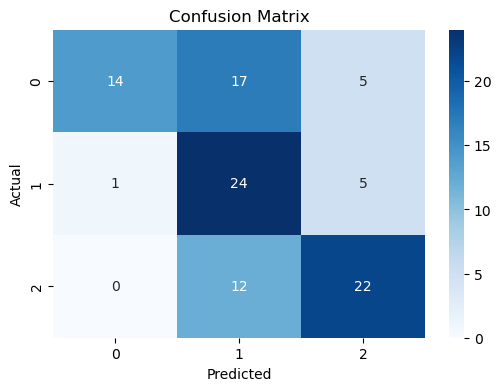

In [44]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

# Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\FELCIA.A\\Downloads\\sentiment analysis\\sentiment_analysis.csv")   # change file name accordingly

# Step 3: Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def preprocess(text):
    if isinstance(text, str):
        text = text.lower()                     # lowercase
        text = re.sub(r'[^a-z\s]', '', text)    # remove punctuation & numbers
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    else:
        return ""

df['clean_text'] = df['text'].apply(preprocess)   # YOUR actual column name

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Step 5: TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 6: Train Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 7: Predictions & Evaluation
y_pred = model.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


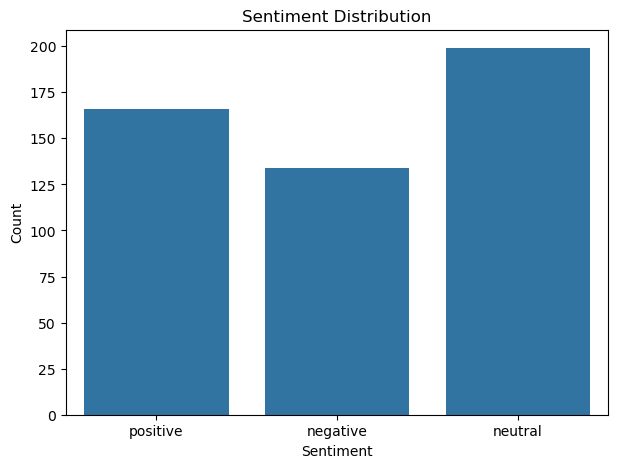

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


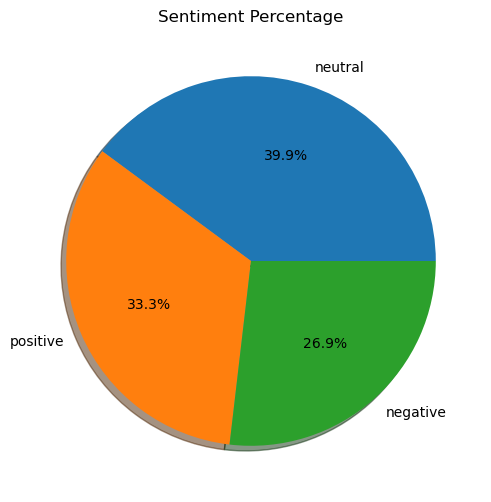

In [46]:
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()